# Principal Component Analysis (PCA) Project
## Environmental Impact of Fast Fashion Industry

### ST2DA-I2 | 2025-2026

---

## 0.1 Introduction

### Background

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis, machine learning, and signal processing. Its primary goal is to transform high-dimensional data into a lower-dimensional space while preserving as much of the original variability as possible.

### Objectives

The main objectives of this project are:
- To understand and implement the PCA algorithm
- To apply PCA for dimensionality reduction on the Fast Fashion Environmental Impact dataset
- To visualize the results of PCA and interpret the principal components

### Dataset Description

We use the **"True Cost of Fast Fashion"** dataset which contains environmental and sustainability metrics from major fast fashion brands (Shein, Zara, H&M, Forever 21, Uniqlo) across different countries from 2015-2024.

**Why this dataset is suitable for PCA:**
- Multiple correlated environmental variables (CO2 emissions, water usage, landfill waste)
- Mix of production, economic, and sustainability metrics that may share underlying factors
- Large sample size (3000+ observations) for reliable statistical analysis

**Why we use Correlation-based PCA (Normalized PCA):**
- Variables have different units and scales (tonnes, liters, USD, percentages)
- Standardization ensures all variables contribute equally to the analysis
- Correlation matrix is more appropriate than covariance matrix when scales differ


---

## 0.2 Methodology

### Step 1: Import Required Libraries


In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']
sns.set_palette(colors)

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


### Step 2: Load and Explore the Dataset


In [3]:
# Load the dataset
df = pd.read_csv('true_cost_fast_fashion.csv')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape: {df.shape[0]} observations × {df.shape[1]} variables")
print(f"\nColumn names:\n{df.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


DATASET OVERVIEW

Shape: 3000 observations × 25 variables

Column names:
['Brand', 'Country', 'Year', 'Monthly_Production_Tonnes', 'Avg_Item_Price_USD', 'Release_Cycles_Per_Year', 'Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres', 'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD', 'Working_Hours_Per_Week', 'Child_Labor_Incidents', 'Return_Rate_Percent', 'Avg_Spend_Per_Customer_USD', 'Shopping_Frequency_Per_Year', 'Instagram_Mentions_Thousands', 'TikTok_Mentions_Thousands', 'Sentiment_Score', 'Social_Sentiment_Label', 'GDP_Contribution_Million_USD', 'Env_Cost_Index', 'Sustainability_Score', 'Transparency_Index', 'Compliance_Score', 'Ethical_Rating']

First 5 rows of the dataset:


,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12


In [4]:
# Data types and missing values
print("\n" + "="*60)
print("DATA TYPES AND MISSING VALUES")
print("="*60)
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

# Statistical summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe().round(2)



DATA TYPES AND MISSING VALUES
                             Data Type  Non-Null Count  Null Count  Null %
Brand                           object            3000           0     0.0
Country                         object            3000           0     0.0
Year                             int64            3000           0     0.0
Monthly_Production_Tonnes      float64            3000           0     0.0
Avg_Item_Price_USD             float64            3000           0     0.0
Release_Cycles_Per_Year          int64            3000           0     0.0
Carbon_Emissions_tCO2e         float64            3000           0     0.0
Water_Usage_Million_Litres     float64            3000           0     0.0
Landfill_Waste_Tonnes          float64            3000           0     0.0
Avg_Worker_Wage_USD            float64            3000           0     0.0
Working_Hours_Per_Week           int64            3000           0     0.0
Child_Labor_Incidents            int64            3000           0   

,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,Working_Hours_Per_Week,Child_Labor_Incidents,...,Shopping_Frequency_Per_Year,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,...,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,2019.53,497.32,19.94,17.76,10003.87,200.92,795.03,149.82,54.70,1.00,...,11.01,5054.24,3975.17,0.00,503.09,0.56,49.85,49.55,49.96,2.52
std,2.89,149.54,4.92,6.98,3017.98,60.48,201.44,49.79,8.65,1.01,...,4.91,2858.37,2268.39,0.58,195.96,0.26,28.63,28.99,28.86,1.44
min,2015.00,3.82,1.09,6.00,206.09,-38.06,58.24,-52.70,40.00,0.00,...,3.00,110.00,54.00,-1.00,-96.43,0.10,0.01,0.07,0.03,0.00
25%,2017.00,396.36,16.54,12.00,7892.11,160.32,655.84,116.69,47.00,0.00,...,7.00,2558.75,2046.25,-0.49,369.37,0.33,25.32,25.13,25.35,1.27
50%,2020.00,495.54,19.89,18.00,9926.94,200.32,800.00,149.70,55.00,1.00,...,11.00,5055.50,3946.50,0.01,503.99,0.56,50.40,49.04,50.24,2.53
75%,2022.00,596.80,23.32,24.00,12012.62,240.66,934.15,183.75,62.00,2.00,...,15.00,7499.25,5854.25,0.50,634.15,0.78,74.56,75.14,74.64,3.79
max,2024.00,1005.84,36.46,29.00,19585.47,403.83,1480.38,326.45,69.00,5.00,...,19.00,9998.00,7995.00,1.00,1145.80,1.00,99.99,99.97,100.00,5.00


### Step 3: Select Variables for PCA

For PCA, we select **numerical variables** that are relevant to environmental impact analysis:

1. **Production metrics**: Monthly_Production_Tonnes, Release_Cycles_Per_Year
2. **Environmental impact**: Carbon_Emissions_tCO2e, Water_Usage_Million_Litres, Landfill_Waste_Tonnes
3. **Economic factors**: Avg_Item_Price_USD, GDP_Contribution_Million_USD
4. **Sustainability indicators**: Env_Cost_Index, Sustainability_Score, Transparency_Index, Compliance_Score, Ethical_Rating
5. **Social conditions**: Avg_Worker_Wage_USD, Working_Hours_Per_Week, Child_Labor_Incidents


In [5]:
# Select numerical variables for PCA
pca_variables = [
    'Monthly_Production_Tonnes',
    'Avg_Item_Price_USD',
    'Release_Cycles_Per_Year',
    'Carbon_Emissions_tCO2e',
    'Water_Usage_Million_Litres',
    'Landfill_Waste_Tonnes',
    'Env_Cost_Index',
    'Sustainability_Score',
    'Transparency_Index',
    'Compliance_Score',
    'Ethical_Rating',
    'GDP_Contribution_Million_USD',
    'Avg_Worker_Wage_USD',
    'Working_Hours_Per_Week',
    'Child_Labor_Incidents'
]

# Create subset for PCA
X = df[pca_variables].copy()

# Handle any missing values (if present)
X = X.dropna()

# Store the indices for later use
valid_indices = X.index

print(f"Number of variables selected for PCA: {len(pca_variables)}")
print(f"Number of observations: {len(X)}")
print(f"\nSelected variables:")
for i, var in enumerate(pca_variables, 1):
    print(f"  {i}. {var}")


Number of variables selected for PCA: 15
Number of observations: 3000

Selected variables:
  1. Monthly_Production_Tonnes
  2. Avg_Item_Price_USD
  3. Release_Cycles_Per_Year
  4. Carbon_Emissions_tCO2e
  5. Water_Usage_Million_Litres
  6. Landfill_Waste_Tonnes
  7. Env_Cost_Index
  8. Sustainability_Score
  9. Transparency_Index
  10. Compliance_Score
  11. Ethical_Rating
  12. GDP_Contribution_Million_USD
  13. Avg_Worker_Wage_USD
  14. Working_Hours_Per_Week
  15. Child_Labor_Incidents


### Step 4: Data Standardization

Before applying PCA, we must standardize the data because:
- Variables have different scales and units
- PCA is sensitive to variance; variables with larger scales would dominate
- Standardization ensures each variable has mean = 0 and standard deviation = 1

$$z = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.


In [6]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
X_std_df = pd.DataFrame(X_standardized, columns=pca_variables, index=valid_indices)

# Verify standardization
print("Verification of Standardization:")
print("="*50)
verification = pd.DataFrame({
    'Mean (should be ≈0)': X_std_df.mean().round(10),
    'Std (should be ≈1)': X_std_df.std().round(10)
})
print(verification)


Verification of Standardization:
                              Mean (should be ≈0)  Std (should be ≈1)
Monthly_Production_Tonnes                     0.0            1.000167
Avg_Item_Price_USD                            0.0            1.000167
Release_Cycles_Per_Year                       0.0            1.000167
Carbon_Emissions_tCO2e                       -0.0            1.000167
Water_Usage_Million_Litres                    0.0            1.000167
Landfill_Waste_Tonnes                         0.0            1.000167
Env_Cost_Index                               -0.0            1.000167
Sustainability_Score                          0.0            1.000167
Transparency_Index                            0.0            1.000167
Compliance_Score                             -0.0            1.000167
Ethical_Rating                                0.0            1.000167
GDP_Contribution_Million_USD                 -0.0            1.000167
Avg_Worker_Wage_USD                          -0.0        

### Step 5: Compute the Correlation Matrix

Since we use standardized data, the covariance matrix equals the correlation matrix. The correlation matrix shows linear relationships between variables.


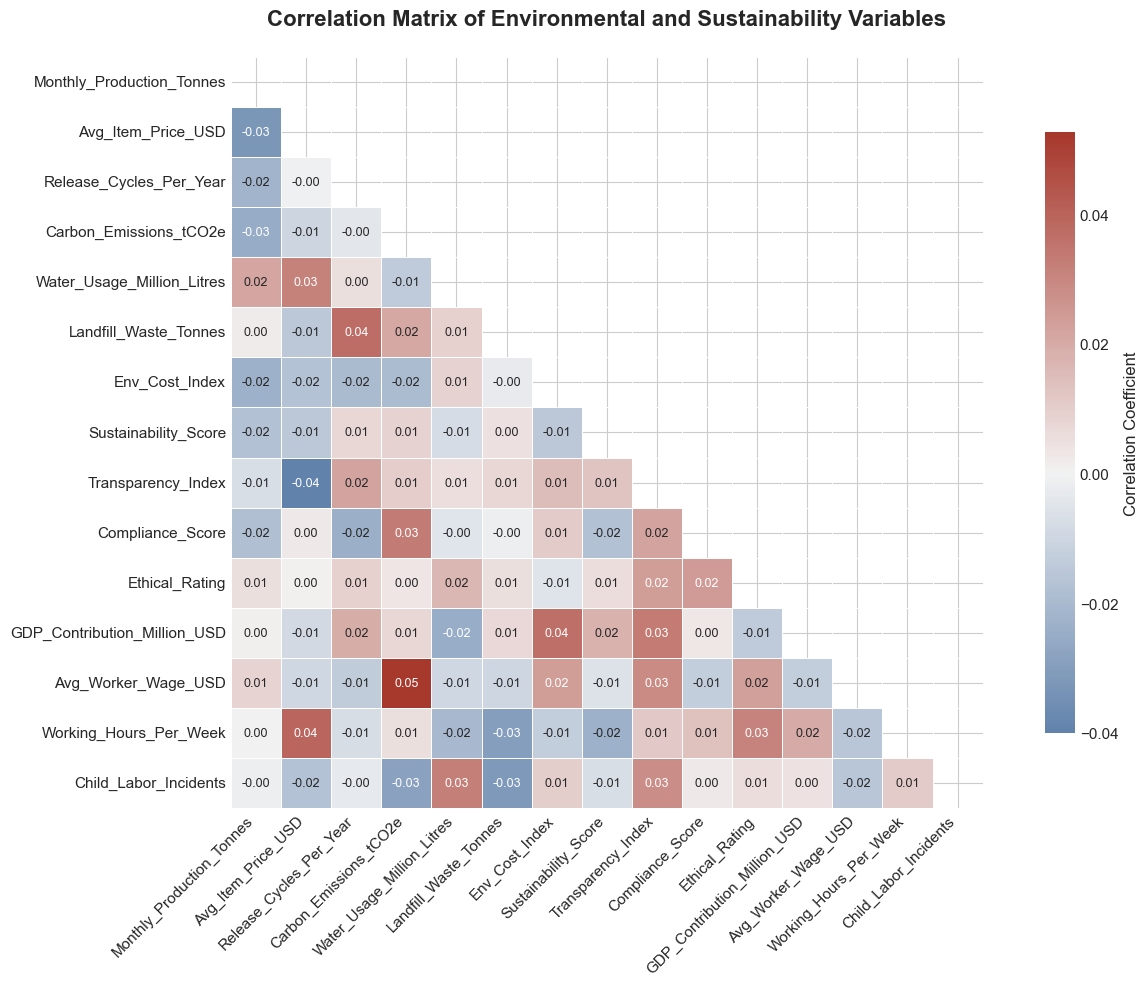


✓ Correlation matrix saved as 'correlation_matrix.png'


In [7]:
# Compute correlation matrix
correlation_matrix = X_std_df.corr()

# Visualize correlation matrix as heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Custom colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center='light', as_cmap=True)

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap=cmap,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 9})

plt.title('Correlation Matrix of Environmental and Sustainability Variables\n', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation matrix saved as 'correlation_matrix.png'")


### Step 6: Compute Eigenvalues and Eigenvectors

The eigenvalues represent the variance explained by each principal component, and the eigenvectors define the direction of the principal components in the original feature space.

**Mathematical Foundation:**

For a correlation matrix $\mathbf{R}$, we solve:
$$\mathbf{R} \cdot \mathbf{v} = \lambda \cdot \mathbf{v}$$

where $\lambda$ are the eigenvalues and $\mathbf{v}$ are the eigenvectors.


In [8]:
# Manual computation using numpy
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix.values)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

# Calculate explained variance ratio
total_variance = np.sum(eigenvalues_sorted)
explained_variance_ratio = eigenvalues_sorted / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display results
print("="*70)
print("EIGENVALUE ANALYSIS")
print("="*70)

eigenvalue_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues_sorted))],
    'Eigenvalue (λ)': eigenvalues_sorted.real.round(4),
    'Variance Explained (%)': (explained_variance_ratio * 100).real.round(2),
    'Cumulative Variance (%)': (cumulative_variance * 100).real.round(2)
})

print(eigenvalue_df.to_string(index=False))


EIGENVALUE ANALYSIS
Principal Component  Eigenvalue (λ)  Variance Explained (%)  Cumulative Variance (%)
                PC1          1.1138                    7.43                     7.43
                PC2          1.0896                    7.26                    14.69
                PC3          1.0802                    7.20                    21.89
                PC4          1.0625                    7.08                    28.97
                PC5          1.0531                    7.02                    35.99
                PC6          1.0290                    6.86                    42.85
                PC7          1.0126                    6.75                    49.61
                PC8          1.0063                    6.71                    56.31
                PC9          0.9851                    6.57                    62.88
               PC10          0.9777                    6.52                    69.40
               PC11          0.9439          

---

## 0.3 Application of PCA

### Step 7: Apply PCA and Determine Number of Components to Retain

We use 
 **Cumulative Variance**: Retain components explaining at least 70-80% of variance


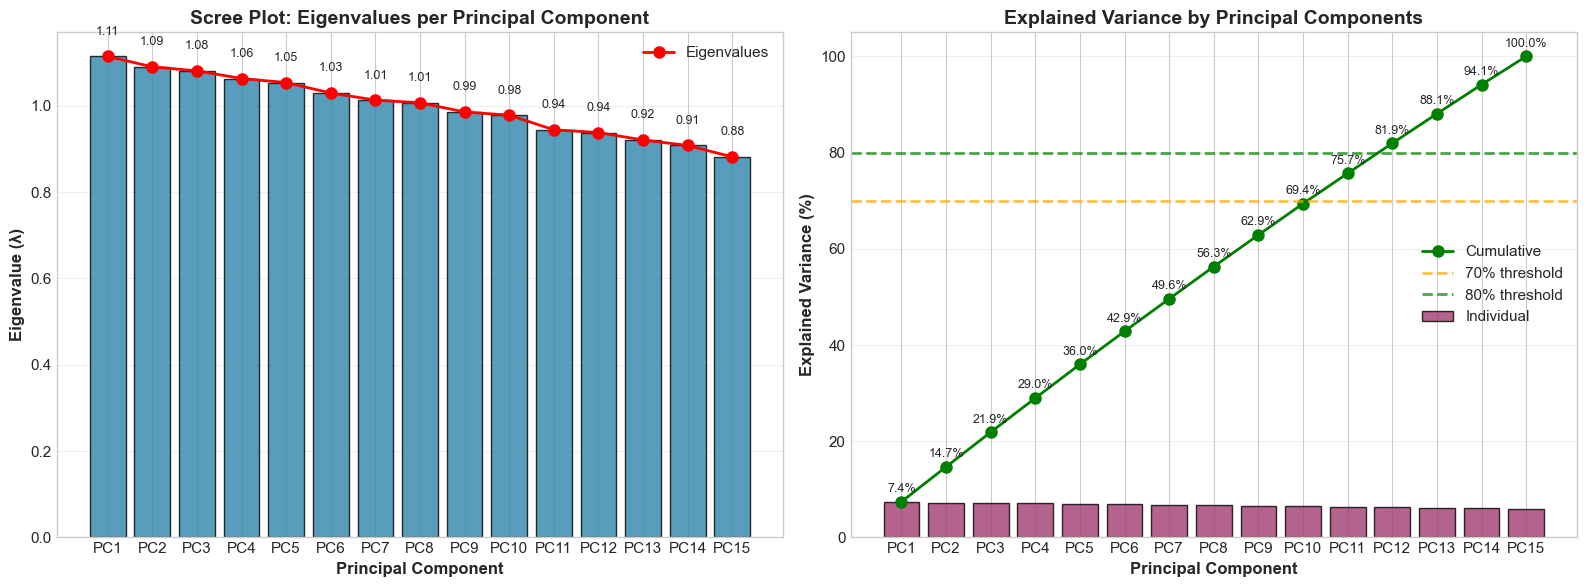


✓ Scree plot saved as 'scree_plot.png'


In [9]:
# Apply PCA with all components first
pca_full = PCA()
pca_full.fit(X_standardized)

# Create Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scree Plot with Eigenvalues
ax1 = axes[0]
pc_labels = [f'PC{i+1}' for i in range(len(pca_full.explained_variance_))]

bars = ax1.bar(pc_labels, pca_full.explained_variance_, color='#2E86AB', alpha=0.8, edgecolor='black')
ax1.plot(pc_labels, pca_full.explained_variance_, 'ro-', markersize=8, linewidth=2, label='Eigenvalues')

# Kaiser criterion line
#ax1.axhline(y=1, color='#C73E1D', linestyle='--', linewidth=2, label='Kaiser Criterion (λ=1)')

ax1.set_xlabel('Principal Component', fontweight='bold')
ax1.set_ylabel('Eigenvalue (λ)', fontweight='bold')
ax1.set_title('Scree Plot: Eigenvalues per Principal Component', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Annotate eigenvalues
for i, v in enumerate(pca_full.explained_variance_):
    if v > 0.5:
        ax1.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=9)

# Plot 2: Cumulative Explained Variance
ax2 = axes[1]
cumulative_var = np.cumsum(pca_full.explained_variance_ratio_) * 100
individual_var = pca_full.explained_variance_ratio_ * 100

ax2.bar(pc_labels, individual_var, color='#A23B72', alpha=0.8, edgecolor='black', label='Individual')
ax2.plot(pc_labels, cumulative_var, 'go-', markersize=8, linewidth=2, label='Cumulative')

# Reference lines
ax2.axhline(y=70, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='70% threshold')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, alpha=0.7, label='80% threshold')

ax2.set_xlabel('Principal Component', fontweight='bold')
ax2.set_ylabel('Explained Variance (%)', fontweight='bold')
ax2.set_title('Explained Variance by Principal Components', fontsize=14, fontweight='bold')
ax2.legend(loc='center right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 105)

# Annotate cumulative percentages
for i, v in enumerate(cumulative_var):
    ax2.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../figures/scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Scree plot saved as 'scree_plot.png'")


In [10]:
# Determine optimal number of components
print("="*70)
print("COMPONENT SELECTION ANALYSIS")
print("="*70)

# Kaiser criterion
#n_kaiser = np.sum(pca_full.explained_variance_ > 1)
#print(f"\n1. Kaiser Criterion (eigenvalue > 1): {n_kaiser} components")

# 70% variance threshold
n_70 = np.argmax(cumulative_var >= 70) + 1
print(f"2. 70% Variance Threshold: {n_70} components")

# 80% variance threshold
n_80 = np.argmax(cumulative_var >= 80) + 1
print(f"3. 80% Variance Threshold: {n_80} components")

# Final selection
# Difference in number between 70% and 80%
max_acceptable_diff = 2  # maximum acceptable additional components

if (n_80 - n_70) <= max_acceptable_diff:
    n_components = n_80
    criterion_used = "80% variance (close to 70%)"
else:
    n_components = n_70
    criterion_used = "70% variance (80% requires too many components)"

# Ensure at least 2 components for visualization
n_components = max(n_components, 2)


print(f"\n→ Selected number of components: {n_components}")
print(f"→ Selection criterion: {criterion_used}")
print(f"→ Total variance explained: {cumulative_var[n_components-1]:.2f}%")


COMPONENT SELECTION ANALYSIS
2. 70% Variance Threshold: 11 components
3. 80% Variance Threshold: 12 components

→ Selected number of components: 12
→ Selection criterion: 80% variance (close to 70%)
→ Total variance explained: 81.94%


### Step 8: Transform Data and Calculate Factor Loadings


In [11]:
# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_standardized)

# Create DataFrame with principal components
pc_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(principal_components, columns=pc_columns, index=valid_indices)

# Add categorical variables for analysis
df_pca['Brand'] = df.loc[valid_indices, 'Brand'].values
df_pca['Country'] = df.loc[valid_indices, 'Country'].values
df_pca['Year'] = df.loc[valid_indices, 'Year'].values

# Calculate factor loadings (correlations between variables and components)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, index=pca_variables, columns=[f'PC{i+1}' for i in range(n_components)])

print("Saturation matrix (Correlations between variables and components):")
print("="*70)
print(loading_df.round(4))

# Quality of representation (sum of squared loadings)
print("\n\nQuality of Representation (cos² - sum of squared loadings):")
print("="*70)
cos2 = loading_df ** 2
cos2['Total'] = cos2.sum(axis=1)
print(cos2.round(4))


Saturation matrix (Correlations between variables and components):
                                 PC1     PC2     PC3     PC4     PC5     PC6  \
Monthly_Production_Tonnes    -0.1508 -0.0686  0.2180  0.4194  0.1106 -0.4965   
Avg_Item_Price_USD           -0.3980  0.1312 -0.3517 -0.2968  0.1195  0.2868   
Release_Cycles_Per_Year       0.1613 -0.2763  0.1411 -0.4458  0.3614  0.0104   
Carbon_Emissions_tCO2e        0.4263  0.0169 -0.4850  0.0952  0.0664  0.0366   
Water_Usage_Million_Litres   -0.2368  0.0438  0.2518  0.1546  0.4894  0.4038   
Landfill_Waste_Tonnes         0.2501 -0.4050 -0.0112 -0.1120  0.3030  0.1789   
Env_Cost_Index                0.1874  0.2171  0.2787  0.0990 -0.3476  0.5207   
Sustainability_Score          0.2236 -0.2490  0.0711 -0.1727  0.0052 -0.1435   
Transparency_Index            0.4799  0.2723  0.2938 -0.0569  0.2089 -0.0794   
Compliance_Score              0.1670  0.4032 -0.2112 -0.0491  0.0446  0.1964   
Ethical_Rating                0.1283  0.3098 -0.0717 


✓ Saturation matrix saved as saturation_matrix.png


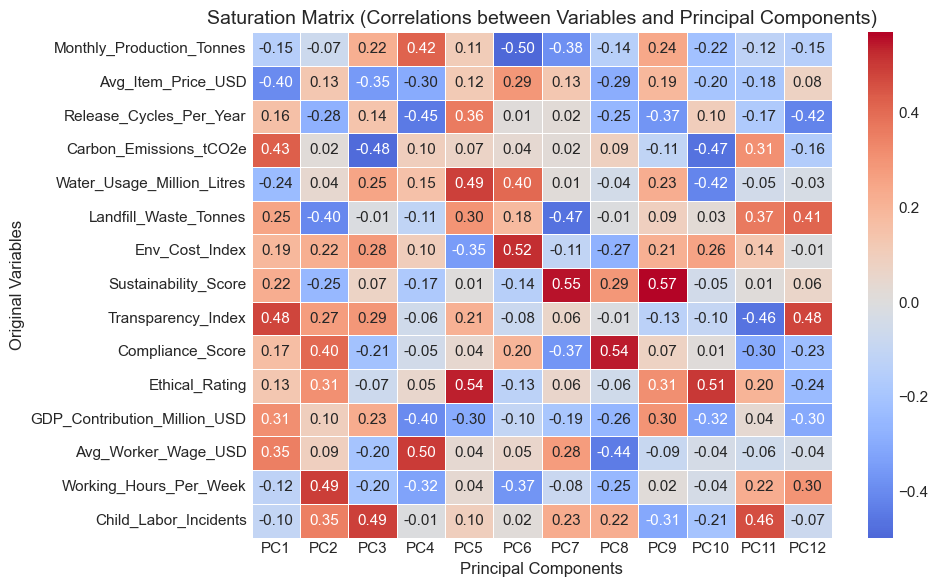

In [12]:
# Visualizing saturation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(
    loading_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Saturation Matrix (Correlations between Variables and Principal Components)")
plt.ylabel("Original Variables")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.savefig('../figures/saturation_matrix.png', dpi=300, bbox_inches='tight')
print('\n✓ Saturation matrix saved as saturation_matrix.png')
plt.show()


### Step 9: Visualization - Correlation Circle

The correlation circle shows how original variables are correlated with the principal components. Variables close to the edge of the circle are well represented.


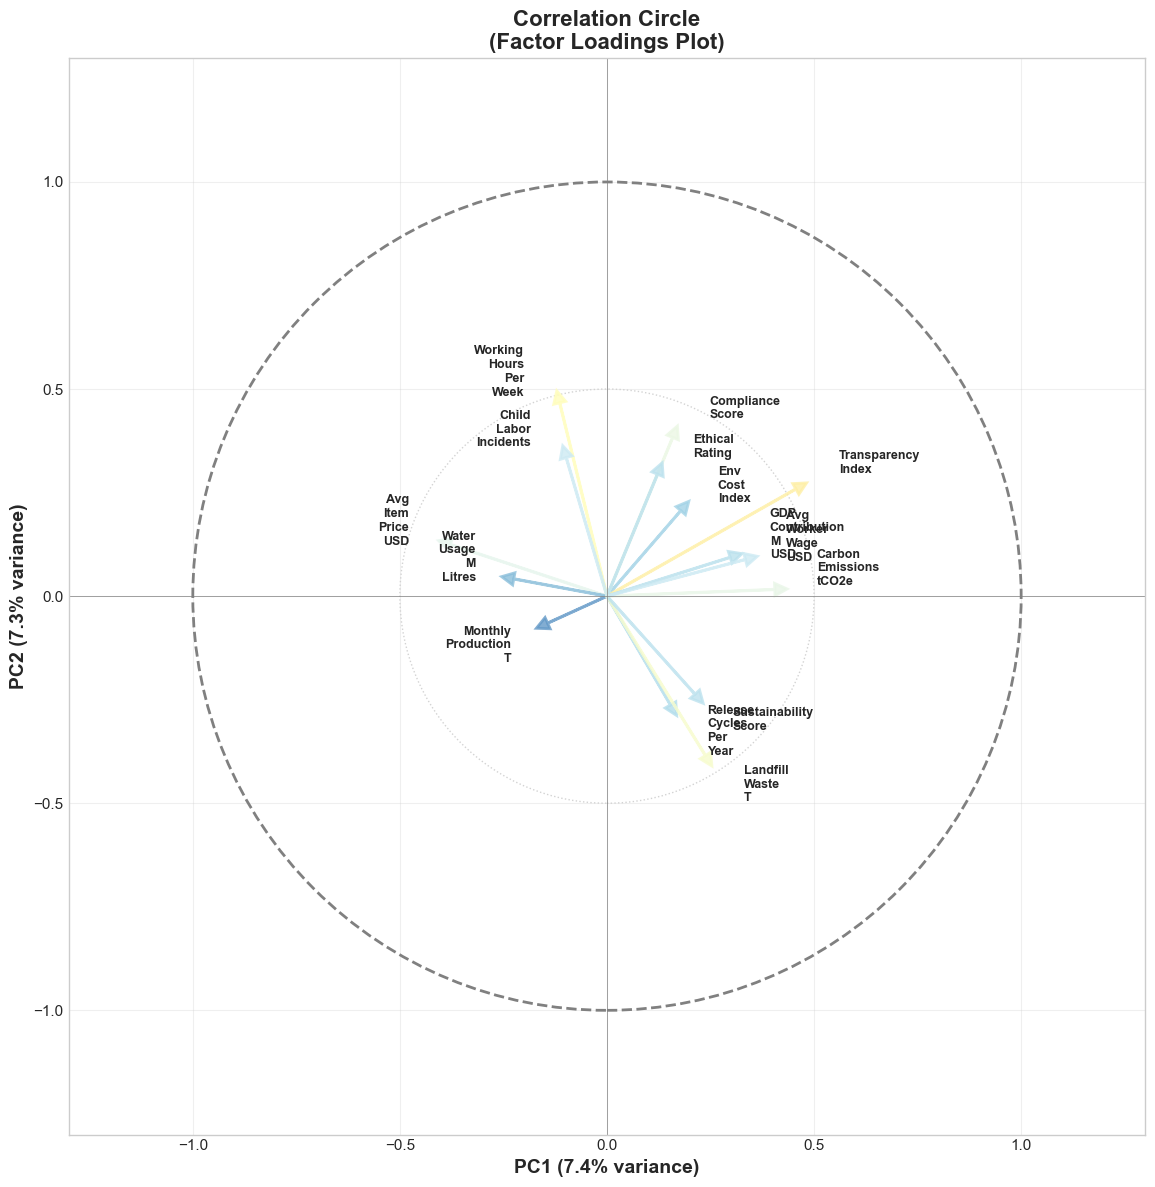


✓ Correlation circle saved as 'correlation_circle.png'


In [13]:
# Create Correlation Circle
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', linewidth=2)
ax.add_patch(circle)

# Draw 0.5 circle for reference
circle_05 = plt.Circle((0, 0), 0.5, fill=False, color='lightgray', linestyle=':', linewidth=1)
ax.add_patch(circle_05)

# Plot arrows for each variable
for i, var in enumerate(pca_variables):
    x, y = loading_df.iloc[i, 0], loading_df.iloc[i, 1]
    
    # Arrow color based on contribution
    contribution = np.sqrt(x**2 + y**2)
    color = plt.cm.RdYlBu_r(contribution)
    
    ax.arrow(0, 0, x*0.95, y*0.95, 
             head_width=0.03, head_length=0.03, 
             fc=color, ec=color, linewidth=2, alpha=0.8)
    
    # Add labels with offset
    offset_x = 0.08 if x >= 0 else -0.08
    offset_y = 0.05 if y >= 0 else -0.05
    ha = 'left' if x >= 0 else 'right'
    
    # Shorten variable names for display
    short_name = var.replace('_', '\n').replace('Million', 'M').replace('Tonnes', 'T')
    ax.text(x + offset_x, y + offset_y, short_name, 
            fontsize=9, ha=ha, va='center', fontweight='bold')

# Axes
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

# Labels
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_title('Correlation Circle\n(Factor Loadings Plot)', fontsize=16, fontweight='bold')

ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/correlation_circle.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation circle saved as 'correlation_circle.png'")


### Step 10: Individuals Plot (Observations in PC Space)


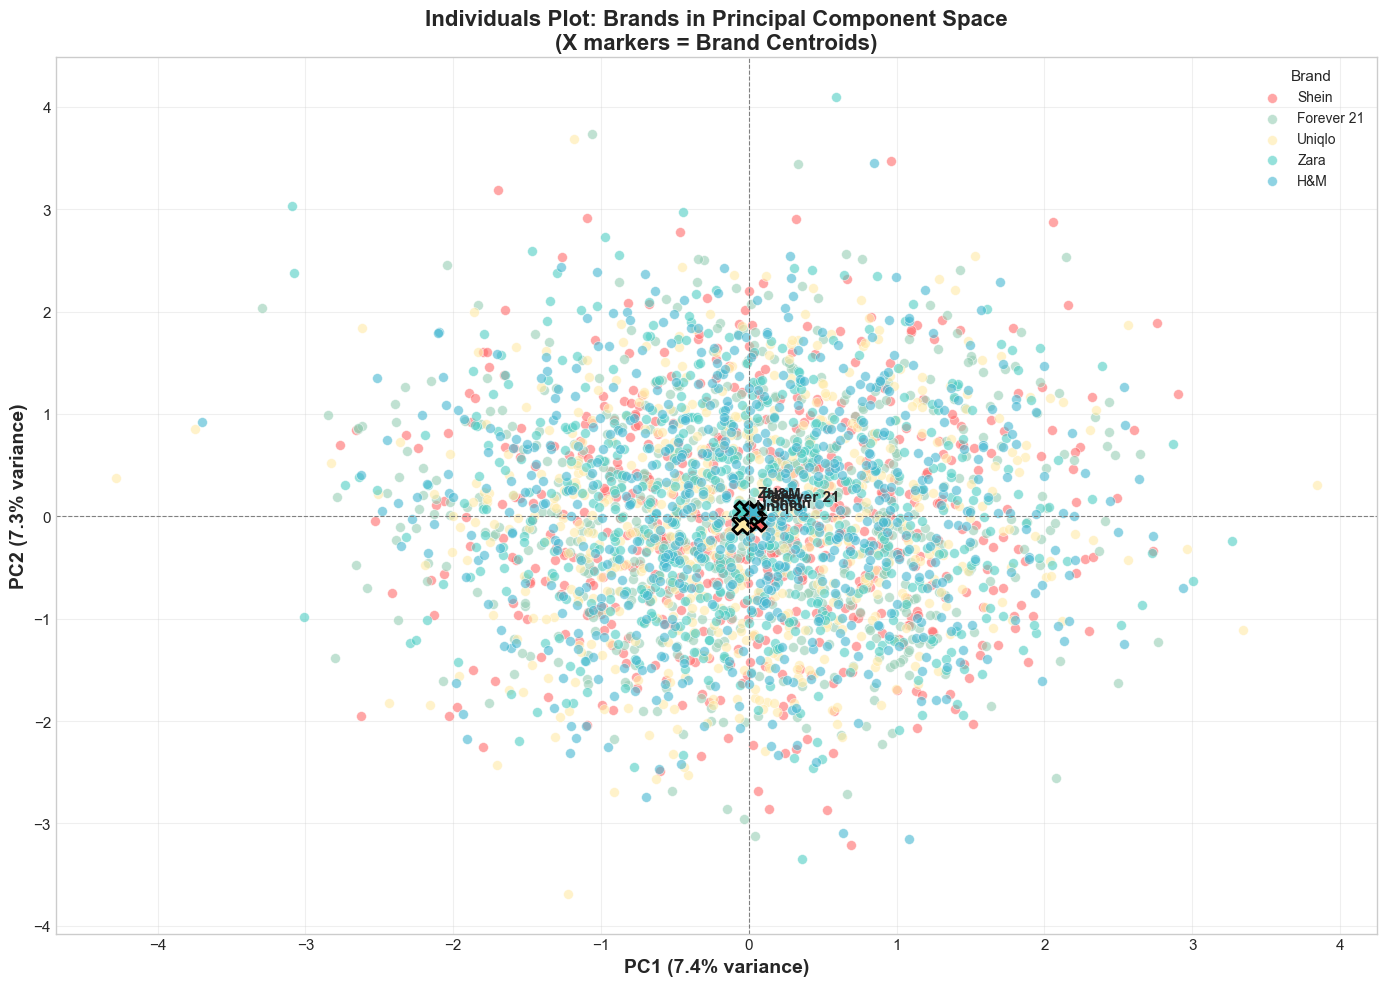


✓ Individuals plot saved as 'individuals_plot_brands.png'


In [14]:
# Create Individuals Plot colored by Brand
fig, ax = plt.subplots(figsize=(14, 10))

brands = df_pca['Brand'].unique()
brand_colors = {'Shein': '#FF6B6B', 'Zara': '#4ECDC4', 'H&M': '#45B7D1', 
                'Forever 21': '#96CEB4', 'Uniqlo': '#FFEAA7'}

for brand in brands:
    mask = df_pca['Brand'] == brand
    ax.scatter(df_pca.loc[mask, 'PC1'], df_pca.loc[mask, 'PC2'],
               label=brand, alpha=0.6, s=50, c=brand_colors.get(brand, 'gray'),
               edgecolors='white', linewidth=0.5)

# Add brand centroids
for brand in brands:
    mask = df_pca['Brand'] == brand
    centroid_x = df_pca.loc[mask, 'PC1'].mean()
    centroid_y = df_pca.loc[mask, 'PC2'].mean()
    ax.scatter(centroid_x, centroid_y, marker='X', s=200, 
               c=brand_colors.get(brand, 'gray'), edgecolors='black', linewidth=2)
    ax.annotate(brand, (centroid_x, centroid_y), fontsize=11, fontweight='bold',
                xytext=(10, 10), textcoords='offset points')

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_title('Individuals Plot: Brands in Principal Component Space\n(X markers = Brand Centroids)', fontsize=16, fontweight='bold')
ax.legend(title='Brand', loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/individuals_plot_brands.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Individuals plot saved as 'individuals_plot_brands.png'")


### Step 11: Biplot (Combined Variables and Individuals)


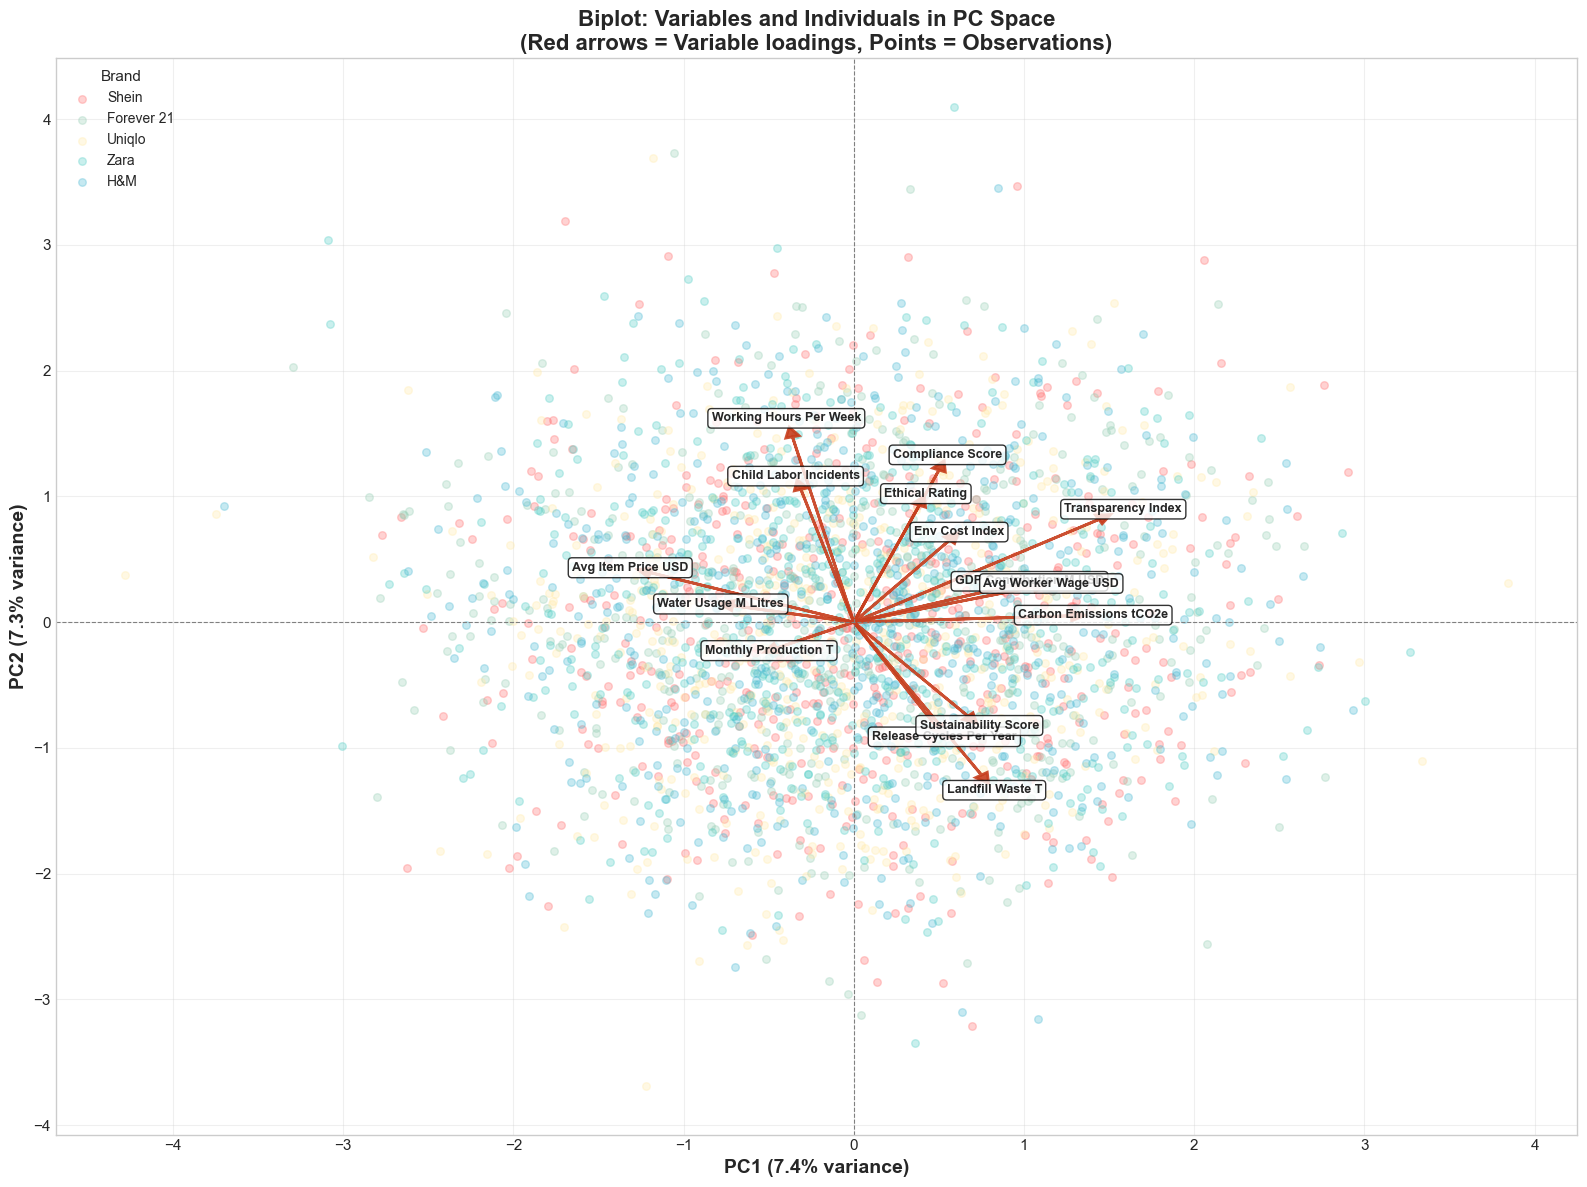


✓ Biplot saved as 'biplot.png'


In [15]:
# Create Biplot
fig, ax = plt.subplots(figsize=(16, 12))

# Scale factor for arrows
scale = 3

# Plot individuals (smaller, semi-transparent)
for brand in brands:
    mask = df_pca['Brand'] == brand
    ax.scatter(df_pca.loc[mask, 'PC1'], df_pca.loc[mask, 'PC2'],
               label=brand, alpha=0.3, s=30, c=brand_colors.get(brand, 'gray'))

# Plot variable arrows
for i, var in enumerate(pca_variables):
    x, y = loading_df.iloc[i, 0] * scale, loading_df.iloc[i, 1] * scale
    
    ax.arrow(0, 0, x, y, 
             head_width=0.08, head_length=0.08, 
             fc='#C73E1D', ec='#C73E1D', linewidth=2, alpha=0.9)
    
    # Label
    short_name = var.replace('_', ' ').replace('Million ', 'M ').replace('Tonnes', 'T')
    ax.text(x * 1.1, y * 1.1, short_name, 
            fontsize=9, ha='center', va='center', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=14, fontweight='bold')
ax.set_title('Biplot: Variables and Individuals in PC Space\n(Red arrows = Variable loadings, Points = Observations)', 
             fontsize=16, fontweight='bold')
ax.legend(title='Brand', loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/biplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Biplot saved as 'biplot.png'")


---

## 0.4 Results and Discussion

### Interpretation of Principal Components


In [16]:
# Detailed interpretation
print("="*70)
print("INTERPRETATION OF PRINCIPAL COMPONENTS")
print("="*70)

# Calculate contributions of variables to each PC
contributions = (pca.components_.T ** 2) * 100
contribution_df = pd.DataFrame(contributions, index=pca_variables, columns=[f'PC{i+1}' for i in range(n_components)])
avg_contrib = 100 / len(pca_variables)

# For each component, identify main contributors
for i in range(min(n_components, 4)):
    print(f"\n{'='*60}")
    print(f"PRINCIPAL COMPONENT {i+1}")
    print(f"Variance Explained: {pca.explained_variance_ratio_[i]*100:.2f}%")
    print(f"{'='*60}")
    
    # Get loadings for this component
    pc_loadings = loading_df.iloc[:, i].sort_values(key=abs, ascending=False)
    
    print("\nTop contributing variables (by absolute loading):")
    print("-"*50)
    
    for j, (var, loading) in enumerate(pc_loadings.items()):
        if j < 6:  # Top 6
            direction = "positive" if loading > 0 else "negative"
            contrib = contribution_df.iloc[pca_variables.index(var), i]
            print(f"  {var:40s} | Loading: {loading:+.4f} | Contrib: {contrib:.1f}%")
    
    # Interpretation
    print("\n→ Interpretation:")
    positive_vars = pc_loadings[pc_loadings > 0.3].index.tolist()[:3]
    negative_vars = pc_loadings[pc_loadings < -0.3].index.tolist()[:3]
    
    if positive_vars:
        print(f"   Positive association with: {', '.join(positive_vars)}")
    if negative_vars:
        print(f"   Negative association with: {', '.join(negative_vars)}")


INTERPRETATION OF PRINCIPAL COMPONENTS

PRINCIPAL COMPONENT 1
Variance Explained: 7.43%

Top contributing variables (by absolute loading):
--------------------------------------------------
  Transparency_Index                       | Loading: +0.4799 | Contrib: 20.7%
  Carbon_Emissions_tCO2e                   | Loading: +0.4263 | Contrib: 16.3%
  Avg_Item_Price_USD                       | Loading: -0.3980 | Contrib: 14.2%
  Avg_Worker_Wage_USD                      | Loading: +0.3517 | Contrib: 11.1%
  GDP_Contribution_Million_USD             | Loading: +0.3130 | Contrib: 8.8%
  Landfill_Waste_Tonnes                    | Loading: +0.2501 | Contrib: 5.6%

→ Interpretation:
   Positive association with: Transparency_Index, Carbon_Emissions_tCO2e, Avg_Worker_Wage_USD
   Negative association with: Avg_Item_Price_USD

PRINCIPAL COMPONENT 2
Variance Explained: 7.26%

Top contributing variables (by absolute loading):
--------------------------------------------------
  Working_Hours_Per_Week 

In [17]:
# ================================
# CONTRIBUTION ANALYSIS (ACADEMIC)
# ================================

print("="*70)
print("CONTRIBUTION OF VARIABLES TO PRINCIPAL COMPONENTS")
print("="*70)

# Number of variables
p = len(pca_variables)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Saturation matrix (already computed as loading_df)
# loading_df: rows = variables, columns = PCs

# Contribution formula: (s_ij^2 / lambda_j) * 100
contribution_df = (loading_df ** 2).div(eigenvalues, axis=1) * 100

# Theoretical threshold
#threshold = 100 / p
threshold = 0.5

print(f"\nTheoretical contribution threshold: {threshold:.2f}%\n")

# Loop over all selected components
for j in range(n_components):
    print(f"{'='*60}")
    print(f"PRINCIPAL COMPONENT PC{j+1}")
    print(f"Variance Explained: {pca.explained_variance_ratio_[j]*100:.2f}%")
    print(f"{'='*60}")

    pc_contrib = contribution_df.iloc[:, j].sort_values(ascending=False)

    significant = pc_contrib[pc_contrib > threshold]

    if significant.empty:
        print("No variable contributes above the theoretical threshold.")
    else:
        print("\nSignificant contributing variables:")
        print("-" * 50)
        for var, value in significant.items():
            print(f"{var:40s} | Contribution: {value:6.2f}%")

    print()


CONTRIBUTION OF VARIABLES TO PRINCIPAL COMPONENTS

Theoretical contribution threshold: 0.50%

PRINCIPAL COMPONENT PC1
Variance Explained: 7.43%

Significant contributing variables:
--------------------------------------------------
Transparency_Index                       | Contribution:  20.67%
Carbon_Emissions_tCO2e                   | Contribution:  16.31%
Avg_Item_Price_USD                       | Contribution:  14.22%
Avg_Worker_Wage_USD                      | Contribution:  11.10%
GDP_Contribution_Million_USD             | Contribution:   8.79%
Landfill_Waste_Tonnes                    | Contribution:   5.62%
Water_Usage_Million_Litres               | Contribution:   5.03%
Sustainability_Score                     | Contribution:   4.49%
Env_Cost_Index                           | Contribution:   3.15%
Compliance_Score                         | Contribution:   2.50%
Release_Cycles_Per_Year                  | Contribution:   2.34%
Monthly_Production_Tonnes                | Contributi

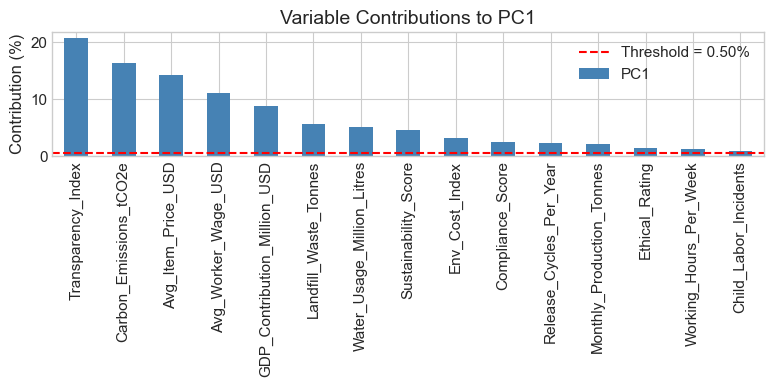

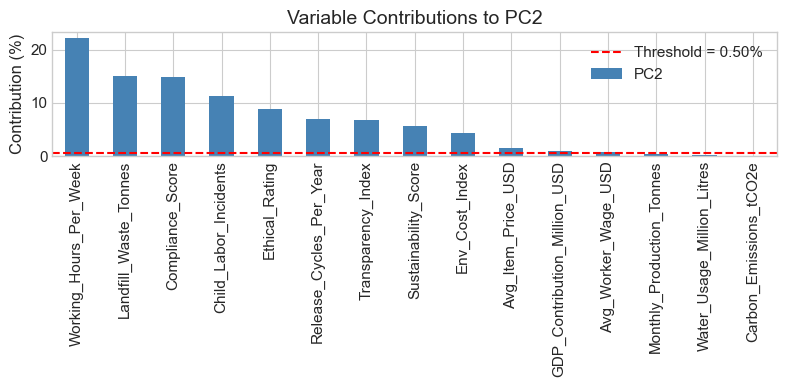

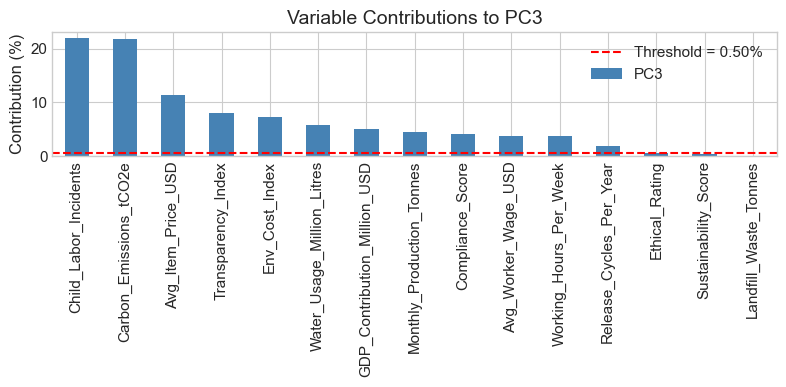

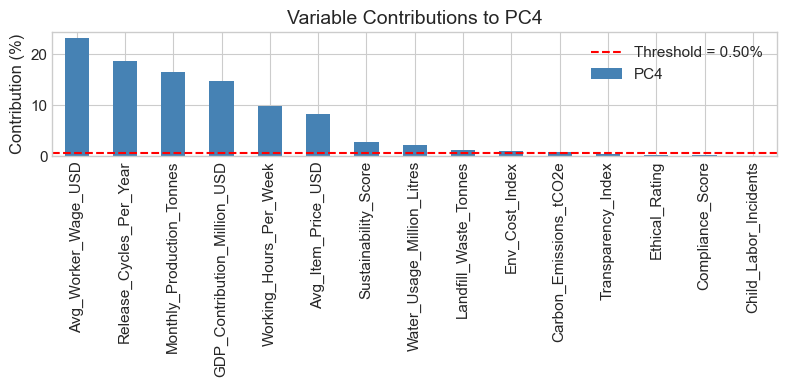

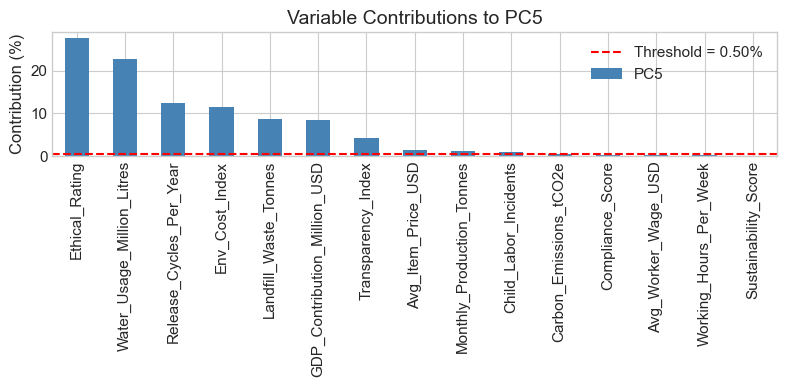

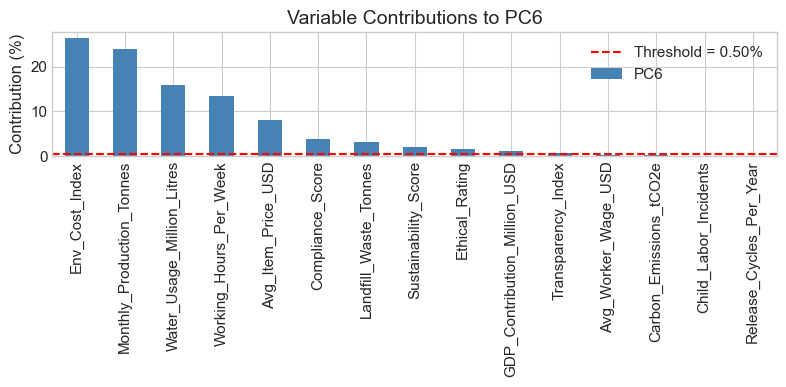

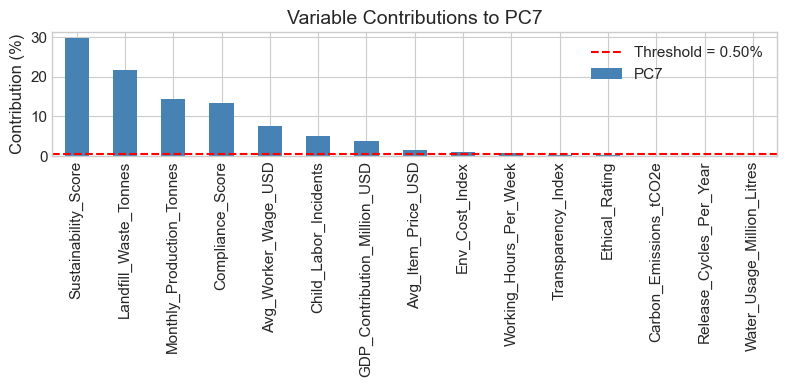

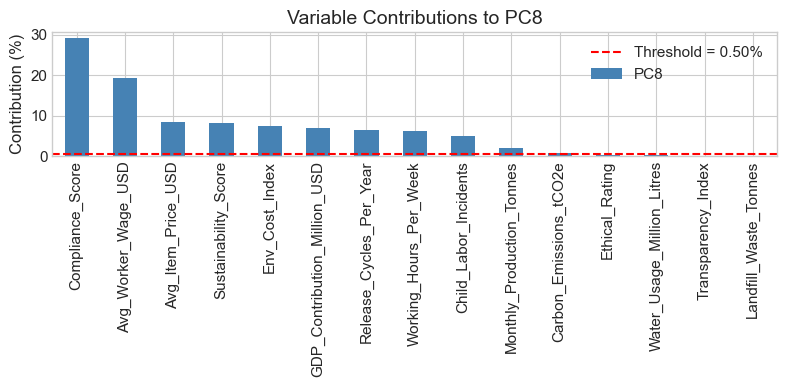

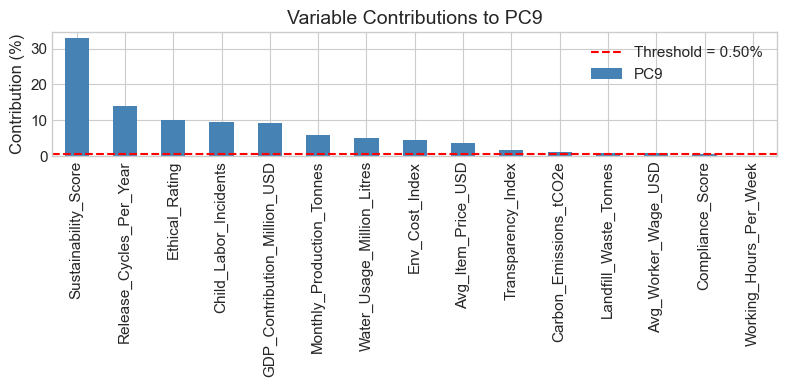

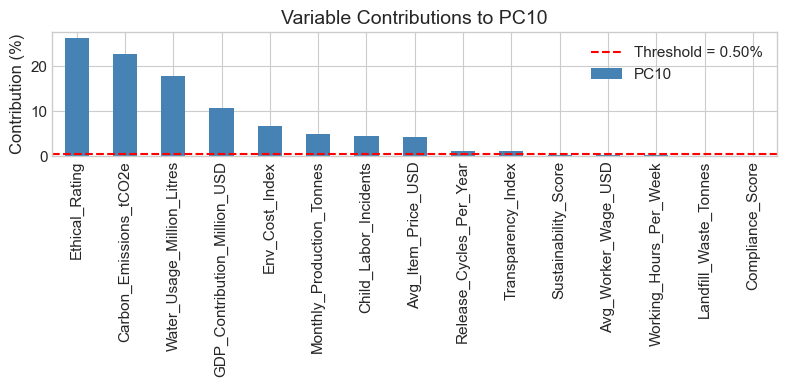

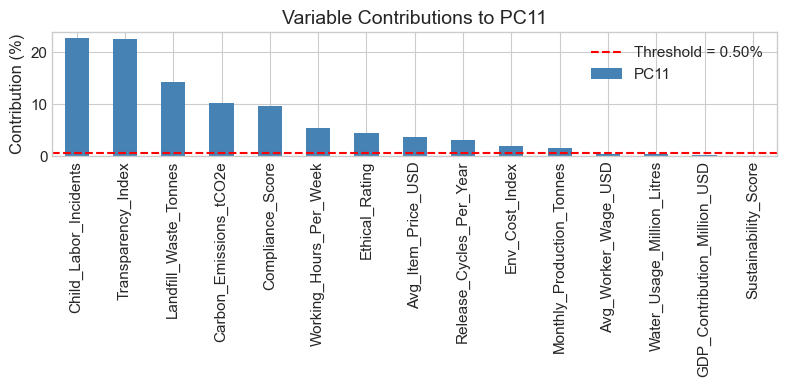

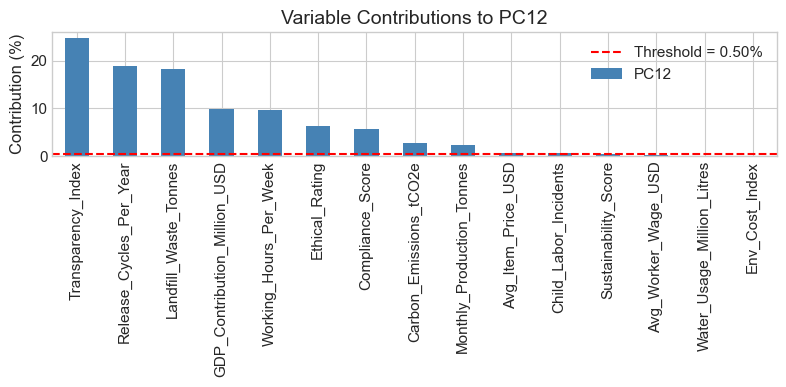

In [18]:
import matplotlib.pyplot as plt

def plot_contributions(contribution_df, threshold):
    for pc in contribution_df.columns:
        values = contribution_df[pc].sort_values(ascending=False)

        plt.figure(figsize=(8, 4))
        values.plot(kind='bar', color='steelblue')

        plt.axhline(threshold, color='red', linestyle='--',
                    label=f'Threshold = {threshold:.2f}%')

        plt.title(f'Variable Contributions to {pc}')
        plt.ylabel('Contribution (%)')
        plt.xticks(rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Call the function
plot_contributions(contribution_df, threshold)


---

## 0.5 Conclusion


In [19]:
print("""
══════════════════════════════════════════════════════════════════════
                              CONCLUSION
══════════════════════════════════════════════════════════════════════

KEY FINDINGS:
─────────────
""")

print(f"1. DIMENSIONALITY REDUCTION SUCCESS:")
print(f"   - Original: {len(pca_variables)} variables")
print(f"   - Reduced to: {n_components} principal components")
print(f"   - Variance preserved: {cumulative_var[n_components-1]:.2f}%")
print(f"   - Compression ratio: {len(pca_variables)/n_components:.1f}x\n")

print(f"2. PRINCIPAL COMPONENTS INTERPRETATION:")
for i in range(min(n_components, 3)):
    top_vars = loading_df.iloc[:, i].abs().nlargest(3).index.tolist()
    print(f"   PC{i+1} ({pca.explained_variance_ratio_[i]*100:.1f}%): Primarily captures {', '.join(top_vars)}")

print(f"""
3. PRACTICAL IMPLICATIONS:
   - PCA reveals underlying patterns in environmental impact data
   - Brands can be compared on reduced dimensional space
   - Facilitates identification of key sustainability drivers

4. COMPUTATIONAL BENEFITS:
   - Reduced feature space for machine learning models
   - Elimination of multicollinearity between variables
   - Easier visualization and interpretation

5. LIMITATIONS:
   - PCA assumes linear relationships between variables
   - Some information loss ({100-cumulative_var[n_components-1]:.2f}% variance not captured)
   - Principal components may be harder to interpret than original variables

══════════════════════════════════════════════════════════════════════
""")



══════════════════════════════════════════════════════════════════════
                              CONCLUSION
══════════════════════════════════════════════════════════════════════

KEY FINDINGS:
─────────────

1. DIMENSIONALITY REDUCTION SUCCESS:
   - Original: 15 variables
   - Reduced to: 12 principal components
   - Variance preserved: 81.94%
   - Compression ratio: 1.2x

2. PRINCIPAL COMPONENTS INTERPRETATION:
   PC1 (7.4%): Primarily captures Transparency_Index, Carbon_Emissions_tCO2e, Avg_Item_Price_USD
   PC2 (7.3%): Primarily captures Working_Hours_Per_Week, Landfill_Waste_Tonnes, Compliance_Score
   PC3 (7.2%): Primarily captures Child_Labor_Incidents, Carbon_Emissions_tCO2e, Avg_Item_Price_USD

3. PRACTICAL IMPLICATIONS:
   - PCA reveals underlying patterns in environmental impact data
   - Brands can be compared on reduced dimensional space
   - Facilitates identification of key sustainability drivers

4. COMPUTATIONAL BENEFITS:
   - Reduced feature space for machine lea

---

## 0.6 Appendix

### Export Results and Generated Files


In [20]:
# Export transformed dataset
df_pca.to_csv('pca_transformed_data.csv', index=True)
print("✓ Transformed data saved to 'pca_transformed_data.csv'")

# Export loadings
loading_df.to_csv('pca_loadings.csv', index=True)
print("✓ Factor loadings saved to 'pca_loadings.csv'")

# Export eigenvalues
eigenvalue_df.to_csv('pca_eigenvalues.csv', index=False)
print("✓ Eigenvalues saved to 'pca_eigenvalues.csv'")

print("\n" + "="*60)
print("ALL FILES GENERATED SUCCESSFULLY!")
print("="*60)
print("""
Generated files:
  📊 correlation_matrix.png
  📊 scree_plot.png
  📊 correlation_circle.png
  📊 individuals_plot_brands.png
  📊 biplot.png
  📄 pca_transformed_data.csv
  📄 pca_loadings.csv
  📄 pca_eigenvalues.csv
""")


✓ Transformed data saved to 'pca_transformed_data.csv'
✓ Factor loadings saved to 'pca_loadings.csv'
✓ Eigenvalues saved to 'pca_eigenvalues.csv'

ALL FILES GENERATED SUCCESSFULLY!

Generated files:
  📊 correlation_matrix.png
  📊 scree_plot.png
  📊 correlation_circle.png
  📊 individuals_plot_brands.png
  📊 biplot.png
  📄 pca_transformed_data.csv
  📄 pca_loadings.csv
  📄 pca_eigenvalues.csv



---

### References

1. Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: a review and recent developments. *Philosophical Transactions of the Royal Society A*, 374(2065), 20150202.

2. Abdi, H., & Williams, L. J. (2010). Principal component analysis. *Wiley interdisciplinary reviews: computational statistics*, 2(4), 433-459.

3. ST2DA Course Materials: Chapter 1 - Introduction to Data Analysis, Chapter 2 - Principal Component Analysis (2025-2026)

---

**Project completed for ST2DA-I2 (2025-2026)**
